## Fetch data

In [1]:
import matplotlib.pyplot as plt 
plt.rcParams.update({
#     'font.size': 20,
    'figure.figsize': (15, 10),
    'axes.facecolor': 'white'

})

import seaborn as sns 
sns.set(
    font_scale=2
)

CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import pandas as pd 
import numpy as np 

pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 50)
pd.set_option('display.max_rows', 100)

TRAIN_SET_LABEL = 'noncoding'
SAMPLE_SIZE = 10000


In [2]:
def compute_N_mean_null_chen(row): 
    a = 1 
    b = -(2*row['N_observed'] + row['new chen zscore']**2)
    c = row['N_observed']**2
    sqrt = np.sqrt(b**2 - 4*a*c)
    sign = 1 if row['new chen zscore'] > 0 else -1
    return (-b + sign*sqrt)/(2*a)
    
def get_windows_scores_annotations_noncoding():
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.enhancer-exon.positive-vista-enhancers.bed'
    df = pd.read_csv(filename, sep='\t')
    df['window overlaps positive vista enhancer'] = df['positive-vista-enhancer count'] > 0    
    df['negative new chen zscore'] = -df['new chen zscore']
    df['N_mean_null_chen'] = df.apply(compute_N_mean_null_chen, axis=1)
    df = df[df['window overlaps merged_exon'] == False]
    return df

windows_scores_annotations_noncoding = get_windows_scores_annotations_noncoding()
windows_scores_annotations_noncoding

,chromosome,start,end,N_observed,N_bar_7_noncoding,N_mean_null_7_noncoding,N_variance_null_7_noncoding,N_bar_1_noncoding,N_mean_null_1_noncoding,N_variance_null_1_noncoding,N_bar_1_noncoding_noisy,N_mean_null_1_noncoding_noisy,N_variance_null_1_noncoding_noisy,N_bar_3_noncoding,N_mean_null_3_noncoding,N_variance_null_3_noncoding,N_bar_3_noncoding_noisy,N_mean_null_3_noncoding_noisy,N_variance_null_3_noncoding_noisy,N_bar_5_noncoding,N_mean_null_5_noncoding,N_variance_null_5_noncoding,N_bar_5_noncoding_noisy,N_mean_null_5_noncoding_noisy,N_variance_null_5_noncoding_noisy,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,"window overlaps (enhancer, merged_exon)",new chen zscore,positive-vista-enhancer count,window overlaps positive vista enhancer,negative new chen zscore,N_mean_null_chen
0,chr1,1432000,1433000,260,-0.372778,265.321432,203.777753,1.590921,236.519249,217.834403,1.676924,235.282294,217.264932,-0.247615,263.528599,203.072610,-0.283079,264.038617,203.540686,-0.339806,264.852332,203.910737,-0.340167,264.858613,204.004160,1000.0,NaN,True,False,"(True, False)",4.299894,0,False,-4.299894,339.191842
4,chr1,1451000,1452000,293,2.951595,252.829443,185.226049,4.803930,223.924244,206.755939,4.877094,222.953222,206.278524,2.367303,260.131776,192.772432,2.332657,260.580640,193.155585,2.725116,255.650992,187.839972,2.724052,255.656435,187.931976,NaN,NaN,False,False,"(False, False)",0.666316,0,False,-0.666316,304.629643
5,chr1,1453000,1454000,260,1.389878,241.020405,186.474887,2.689522,221.525196,204.645755,2.756958,220.604827,204.185875,1.023579,245.832671,191.572571,0.992448,246.250157,191.946387,1.164984,243.990074,188.859460,1.165733,243.977693,188.908549,NaN,NaN,False,False,"(False, False)",0.828398,0,False,-0.828398,273.705039
7,chr1,1458000,1459000,274,2.218475,243.876098,184.379757,3.705533,221.045386,204.223718,3.773446,220.135148,203.767346,1.921190,247.467287,190.731630,1.888404,247.889450,191.179831,2.115020,244.993521,188.087927,2.116651,244.964374,188.175894,NaN,NaN,False,False,"(False, False)",-0.086128,0,False,0.086128,272.578031
11,chr1,1463000,1464000,192,-1.944466,218.459904,185.172213,-2.095294,222.005005,205.067792,-2.032614,221.074506,204.604405,-2.085869,220.639685,188.522242,-2.105358,220.933952,188.870201,-2.012778,219.516464,186.893272,-2.012358,219.510874,186.895193,28.0,NaN,True,False,"(True, False)",2.948188,0,False,-2.948188,237.427713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786070,chr9,137262000,137263000,303,4.459653,242.258268,185.512060,6.063733,217.086956,200.741915,6.128607,216.260297,200.314475,4.256927,244.570154,188.398345,4.225083,244.951922,188.757918,4.403686,242.982775,185.745859,4.407979,242.924712,185.743064,346.0,NaN,True,False,"(True, False)",-2.396149,0,False,2.396149,264.062571
1786071,chr9,137268000,137269000,215,-1.116078,230.165809,184.647017,-0.579673,223.324482,206.228393,-0.513527,222.366123,205.755362,-1.149755,230.788702,188.574204,-1.181149,231.237963,188.996595,-1.180274,231.159081,187.442292,-1.182392,231.190082,187.488718,1000.0,NaN,True,False,"(True, False)",3.640544,0,False,-3.640544,275.417393
1786072,chr9,137269000,137270000,210,-3.060479,251.650751,185.210985,-0.657779,219.366052,202.746590,-0.596997,218.491272,202.302491,-3.445370,257.657992,191.337298,-3.474260,258.105694,191.720447,-3.228932,254.283943,188.093965,-3.225423,254.247196,188.190706,1000.0,NaN,True,False,"(True, False)",5.276351,0,False,-5.276351,301.638272
1786073,chr9,137275000,137276000,296,1.990841,268.077912,196.708291,4.575436,229.442056,211.609361,4.655896,228.354529,211.091617,1.921453,268.932391,198.445131,1.881115,269.472162,198.871703,1.974808,268.272874,197.133316,1.977276,268.231681,197.226096,712.0,NaN,True,False,"(True, False)",2.687348,0,False,-2.687348,345.986596


## Even though Chen and McHale zscores are both "inflated", Chen "inflates" zscores less than McHale

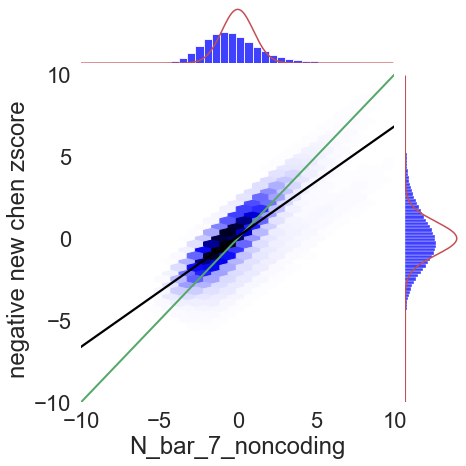

In [3]:
from scipy.stats import norm

# sns.set_theme(style="white")

def plot_chen_against_mchale(df):
    x=f'N_bar_7_{TRAIN_SET_LABEL}'
    y='negative new chen zscore'
    g = sns.jointplot(
        data=df,
        x=x, 
        y=y,
        kind='hex', 
        xlim=(-10, 10), 
        ylim=(-10, 10),
        color="blue", 
        height=7,
        marginal_kws=dict(bins=100, fill=True, color='blue', stat='density')
    )
    g.ax_joint.plot([-10, 10], [-10, 10], 'g-', linewidth=2)
    g.ax_joint.set_facecolor('white')
    g.ax_marg_x.set_facecolor('white')
    g.ax_marg_y.set_facecolor('white')    

    bins = np.arange(-10, 10, 0.1)
    g.ax_marg_x.plot(bins, norm.pdf(bins), 'r-')
    g.ax_marg_y.plot(norm.pdf(bins), bins, 'r-')

    sns.despine(ax=g.ax_joint, left=True, bottom=True)
    sns.despine(ax=g.ax_marg_x, left=True, bottom=True)
    sns.despine(ax=g.ax_marg_y, left=True, bottom=True)

#     g.ax_joint.set_xlabel(None)
#     g.ax_joint.set_ylabel(None)

    sns.regplot(x=df[x], y=df[y], ax=g.ax_joint, scatter=False, color='black')

plot_chen_against_mchale(windows_scores_annotations_noncoding)

In [11]:
def compute_pvalue_mchale(df): 
    N_observed, theta_mean, theta_variance = (
        df['N_observed'],
        df[f'N_mean_null_3_{TRAIN_SET_LABEL}'], 
        df[f'N_variance_null_3_{TRAIN_SET_LABEL}']
    )
    p_value = norm.cdf(N_observed, loc=theta_mean, scale=np.sqrt(theta_variance))
    return p_value, 'SNV counts observed in gnomad, relative to McHale model' 

def compute_pvalue_chen(df): 
    N_observed, theta_mean = (
        df['N_observed'],
        df['N_mean_null_chen'], 
    )
    theta_variance = theta_mean # assume Poisson 
    p_value = norm.cdf(N_observed, loc=theta_mean, scale=np.sqrt(theta_variance))
    return p_value, 'SNV counts observed in gnomad, relative to Chen model' 

def plot_order_statistics(df, compute_pvalue): 
    p_values, name = compute_pvalue(df)
    
    # https://github.com/petermchale/QQ-plots/blob/master/qq-plots.pdf
    observed_order_statistics = np.sort(p_values)
    expected_order_statistics = [(i+1)/(len(df)+1) for i in range(len(df))]    

    plt.plot(
        -np.log10(expected_order_statistics), 
        -np.log10(observed_order_statistics), 
        'o',
        label=name        
    )    

def generate_qq_plot_for_pvalues(df, xlim=[0, 7], ylim=[0, 30], plot_mchale=True):
    if plot_mchale: 
      plot_order_statistics(df, compute_pvalue_mchale)
    plot_order_statistics(df, compute_pvalue_chen)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([0, 7], [0, 7], 'r-', linewidth=2)
    plt.xlabel('-log10(expected pvalue)')
    plt.ylabel('-log10(observed pvalue)')
    plt.legend()


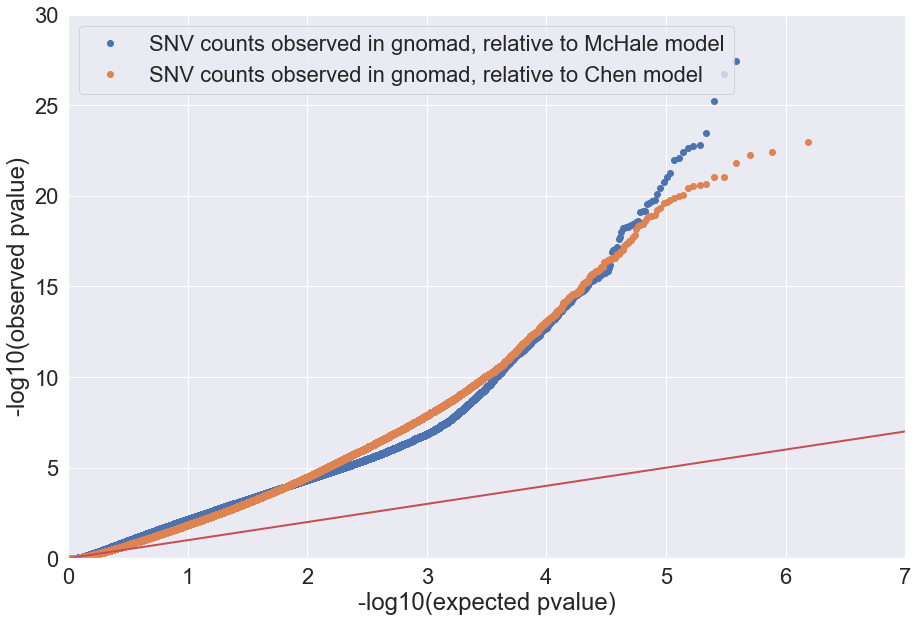

In [12]:
generate_qq_plot_for_pvalues(windows_scores_annotations_noncoding)

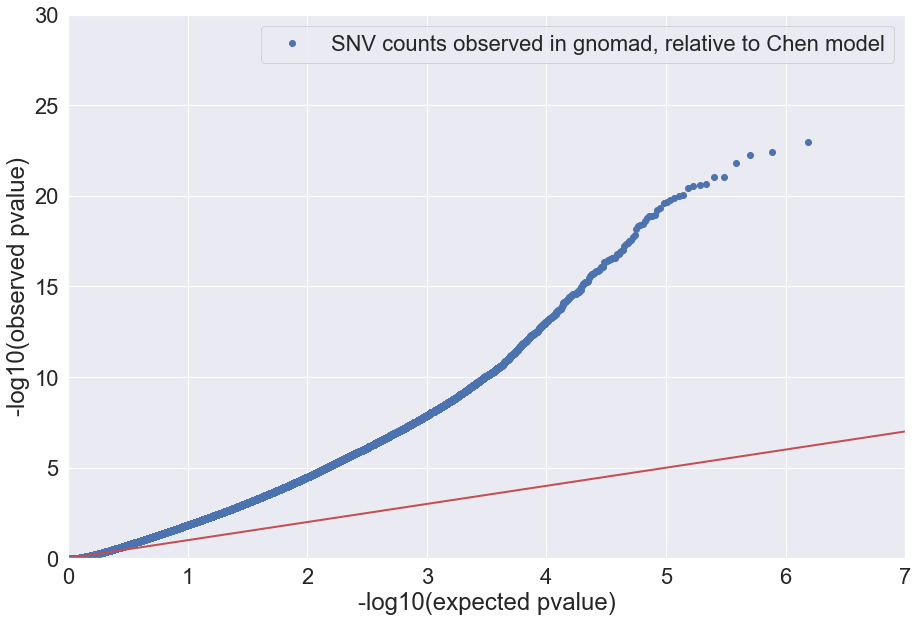

In [13]:
generate_qq_plot_for_pvalues(windows_scores_annotations_noncoding, plot_mchale=False)

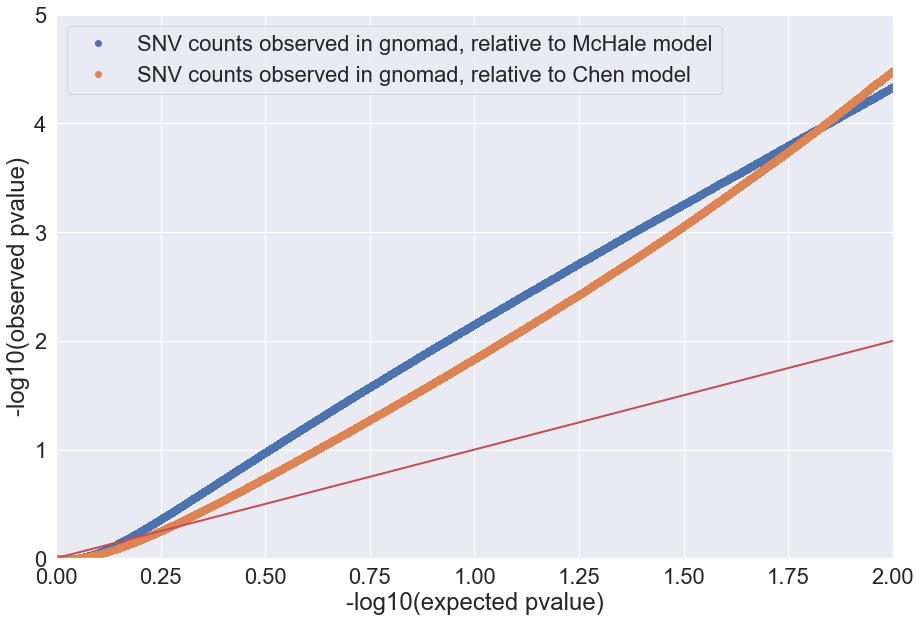

In [7]:
generate_qq_plot_for_pvalues(windows_scores_annotations_noncoding, xlim=[0, 2], ylim=[0, 5])

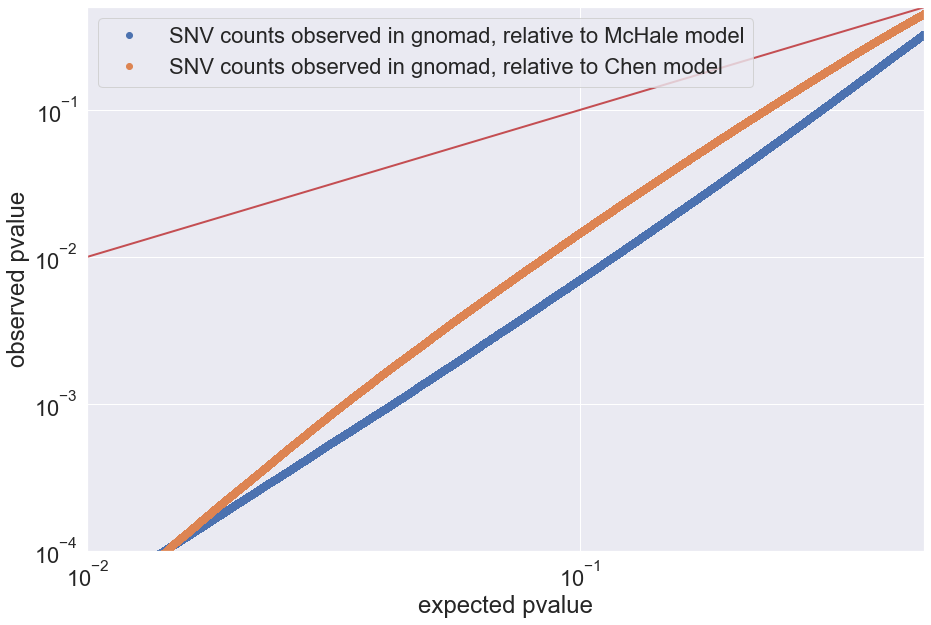

In [8]:
def plot_order_statistics2(df, compute_pvalue): 
    p_values, name = compute_pvalue(df)
    
    # https://github.com/petermchale/QQ-plots/blob/master/qq-plots.pdf
    observed_order_statistics = np.sort(p_values)
    expected_order_statistics = [(i+1)/(len(df)+1) for i in range(len(df))]    

    plt.plot(
        expected_order_statistics, 
        observed_order_statistics, 
        'o',
        label=name        
    )    

def generate_qq_plot_for_pvalues2(df):
    plot_order_statistics2(df, compute_pvalue_mchale)
    plot_order_statistics2(df, compute_pvalue_chen)
    xmin = 1e-2
    ymin = 1e-4
    plt.xlim([xmin, 0.5])
    plt.ylim([ymin, 0.5])
    plt.plot([min(xmin, ymin), 0.5], [min(xmin, ymin), 0.5], 'r-', linewidth=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('expected pvalue')
    plt.ylabel('observed pvalue')
    plt.legend()

generate_qq_plot_for_pvalues2(windows_scores_annotations_noncoding)

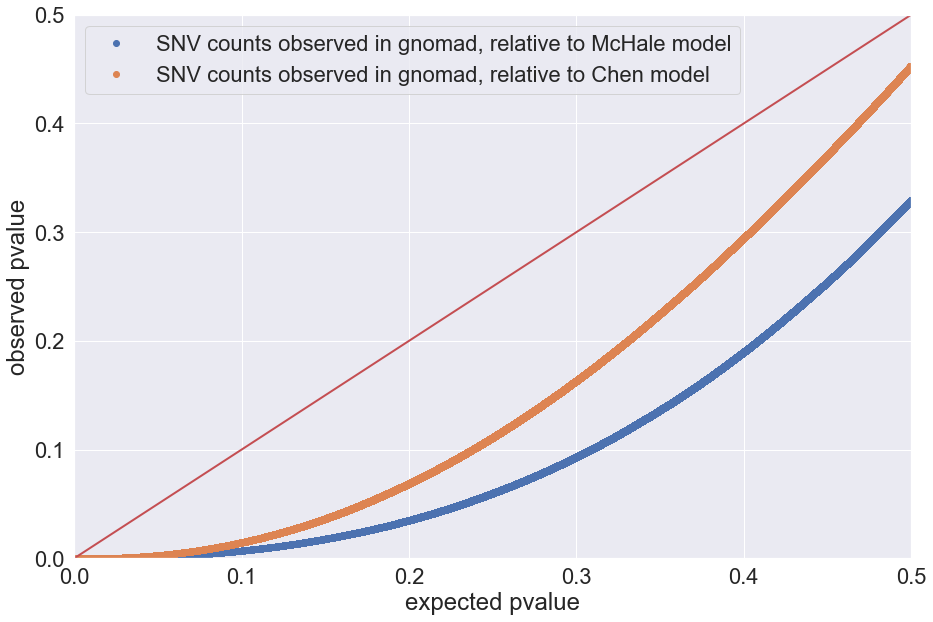

In [9]:
def generate_qq_plot_for_pvalues3(df):
    plot_order_statistics2(df, compute_pvalue_mchale)
    plot_order_statistics2(df, compute_pvalue_chen)
    xmin = 0
    ymin = 0
    plt.xlim([xmin, 0.5])
    plt.ylim([ymin, 0.5])
    plt.plot([min(xmin, ymin), 0.5], [min(xmin, ymin), 0.5], 'r-', linewidth=2)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('expected pvalue')
    plt.ylabel('observed pvalue')
    plt.legend()

# Notice that the Chen curve lies closer to the diagonal than the McHale curve for the largest p-values (which are still <0.5), 
# indicating that the Chen model is a better null model than the McHale model
generate_qq_plot_for_pvalues3(windows_scores_annotations_noncoding)

## Though windows similarly ranked by McHale and Chen are similarly enriched in enhancers, the identity of those windows is drastically different between the models 

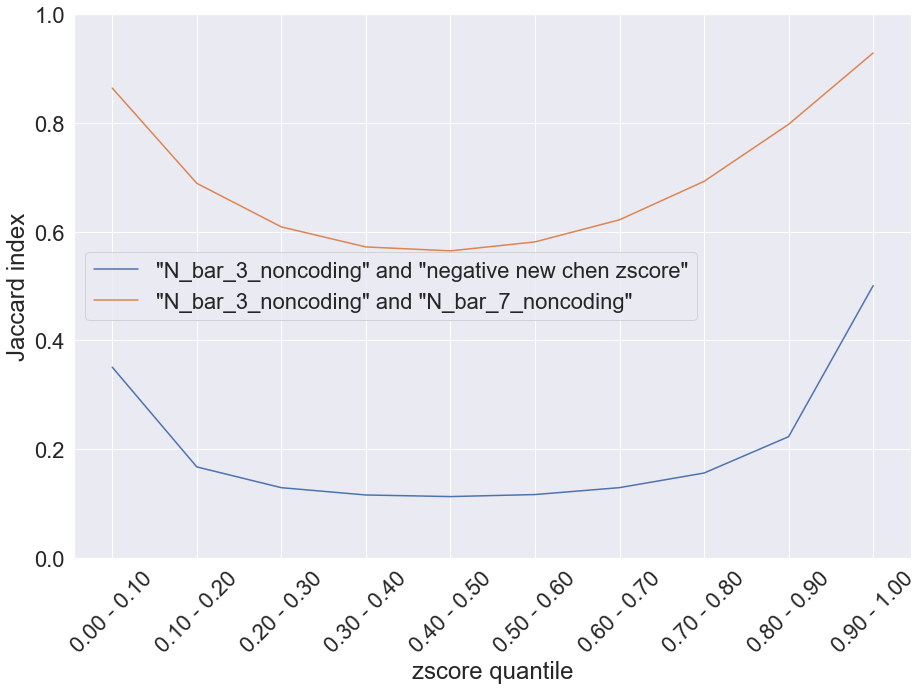

In [10]:
import warnings

def compute_array_of_quantiles():
  number_bins = 10
  delta = 1/number_bins
  # bins should be same size, as jaccard depends upon bin size: 
  array_of_quantiles = np.arange(0, 1+delta, delta)

  starts = array_of_quantiles[:-1]
  ends = array_of_quantiles[1:]
  quantile_labels = [f'{start:.2f} - {end:.2f}' for start, end in zip(starts, ends)]
  
  return array_of_quantiles, quantile_labels

def label_windows_with_score_quantiles_core(df, score): 
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")        

    array_of_quantiles, quantile_labels = compute_array_of_quantiles()

    df[f'{score} quantile'], bins = pd.qcut(
      df[score],
      q = array_of_quantiles, 
      labels = quantile_labels, 
      retbins = True,
#         duplicates='drop'
    )

    return df
    
def plot_jaccard_vs_quantile_core(df, score1, score2): 
  df = label_windows_with_score_quantiles_core(df, score1)
  df = label_windows_with_score_quantiles_core(df, score2)

  _, quantiles = compute_array_of_quantiles()
  jaccard = []
  for quantile in quantiles:
    windows1 = set(df[df[f'{score1} quantile'] == quantile].index)
    windows2 = set(df[df[f'{score2} quantile'] == quantile].index)

    intersection = windows1 & windows2
    union = windows1 | windows2

    jaccard.append(len(intersection)/len(union))

  plt.plot(quantiles, jaccard, label=f'"{score1}" and "{score2}"')

def plot_jaccard_vs_quantile(df): 
  plot_jaccard_vs_quantile_core(
    df,
    score1 = f'N_bar_3_{TRAIN_SET_LABEL}', 
    score2 = 'negative new chen zscore'
  )  
  plot_jaccard_vs_quantile_core(
    df,
    score1 = f'N_bar_3_{TRAIN_SET_LABEL}', 
    score2 = f'N_bar_7_{TRAIN_SET_LABEL}'
  )  
  plt.ylim([0, 1])
  plt.xticks(rotation = 45) 
  plt.ylabel('Jaccard index')
  plt.xlabel('zscore quantile')
  plt.legend()

plot_jaccard_vs_quantile(windows_scores_annotations_noncoding)